<a href="https://colab.research.google.com/github/glauciodrumond/codenation/blob/master/enem-2/Nota_Enem_Codenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo as notas do enem de 2016

In [ ]:
# importando os modulos
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# carregando os dados
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

In [ ]:
# ver o numero de entradas e colunas 
print('Quantidade de linhas por colunas')
print('Dados treino:', data_train.shape)
print('Dados teste:', data_test.shape)

Quantidade de linhas por colunas
Dados treino: (13730, 167)
Dados teste: (4576, 47)


In [ ]:
# Verificar se os dados de teste estão nos dados de treinamento
print('As colunas de teste estão no dataframe de treino?')
if set(data_test.columns).issubset(set(data_train.columns)) == True:
    print('Sim, estão presente.')
else:
    print('Não, estão presente.')
#print(set(data_test.columns).issubset(set(data_train.columns)))

As colunas de teste estão no dataframe de treino?
Sim, estão presente.


# Selecionando as features

In [ ]:
# selecionando as features
test_features = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_INSCRICAO']
train_features = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
                   'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_NOTA_MT']

In [ ]:
# escolhendo as colunas para modelo
dtest = data_test[test_features].copy()
dtrain = data_train[train_features].copy()

# Matrix de correlação

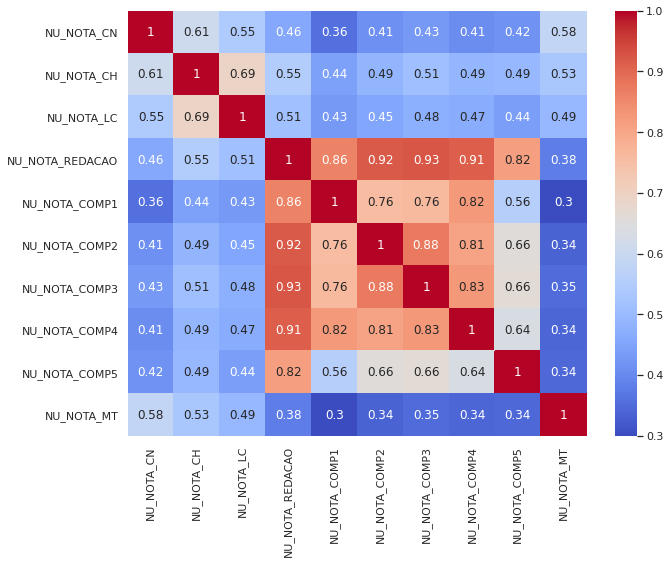

In [ ]:
# matriz de correlacao
corr = dtrain.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, fmt= '.2g', cmap='coolwarm',annot= True )
plt.tight_layout()

# Preenchendo os valores nulos

In [ ]:
# zera os valores ausentes das colunas
dtrain['NU_NOTA_CN'].fillna(0,inplace=True)
dtrain['NU_NOTA_CH'].fillna(0,inplace=True)
dtrain['NU_NOTA_LC'].fillna(0,inplace=True)
dtrain['NU_NOTA_MT'].fillna(0,inplace=True)
dtrain['NU_NOTA_REDACAO'].fillna(0,inplace=True)
dtrain['NU_NOTA_COMP1'].fillna(0,inplace=True)
dtrain['NU_NOTA_COMP2'].fillna(0,inplace=True)
dtrain['NU_NOTA_COMP3'].fillna(0,inplace=True)
dtrain['NU_NOTA_COMP4'].fillna(0,inplace=True)
dtrain['NU_NOTA_COMP5'].fillna(0,inplace=True)

In [ ]:
# zera os valores ausentes das colunas
dtest['NU_NOTA_CN'].fillna(0,inplace=True)
dtest['NU_NOTA_CH'].fillna(0,inplace=True)
dtest['NU_NOTA_LC'].fillna(0,inplace=True)
dtest['NU_NOTA_REDACAO'].fillna(0,inplace=True)
dtest['NU_NOTA_COMP1'].fillna(0,inplace=True)
dtest['NU_NOTA_COMP2'].fillna(0,inplace=True)
dtest['NU_NOTA_COMP3'].fillna(0,inplace=True)
dtest['NU_NOTA_COMP4'].fillna(0,inplace=True)
dtest['NU_NOTA_COMP5'].fillna(0,inplace=True)

In [ ]:
# verificando se há valores nulos
dtrain.isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_MT         0
dtype: int64

# Histograma das notas

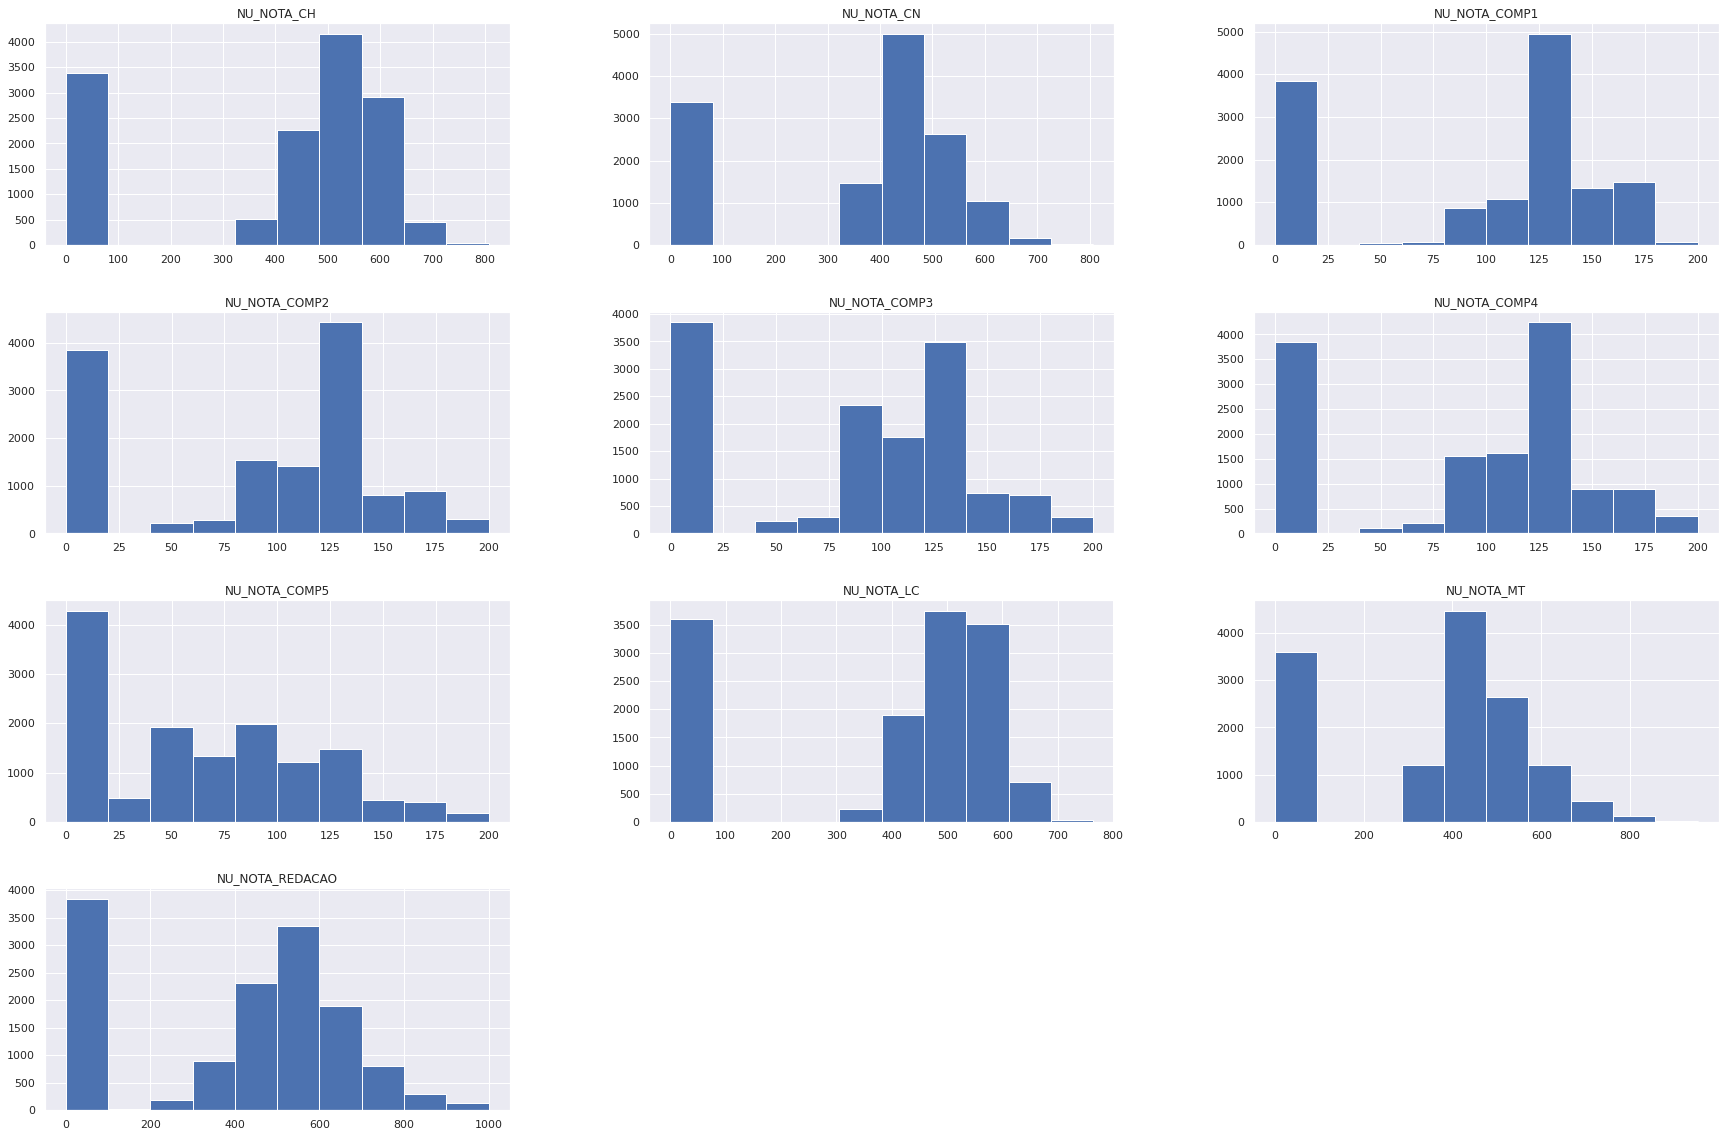

In [ ]:
dtrain.hist(bins =10 , figsize=(30,20));

# Dividindo os dados

In [ ]:
# split dados de treino em train e test
from sklearn.model_selection import train_test_split as tts
X = dtrain.drop(['NU_NOTA_MT'], axis=1)
y = dtrain['NU_NOTA_MT']

# usar os dados de teste como validacao
X_validation = dtest.drop(['NU_INSCRICAO'], axis=1)

# dividindo os dados do df_train em teste e treino
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Importing the librarie e creating the object scaler
# Importando a biblioteca e criando o objeto scaler 
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

# Escalonando os dados de treino e teste
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Modelos

# Grid Search do XGBoost

In [ ]:
'''from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'colsample_bytree':[0.4,0.6,0.8],
              'min_child_weight':[1,6,10],
              'learning_rate':[0.1,0.07],
              'max_depth':[3,5],
              'n_estimators':[500],
              'subsample':[0.6,0.95] }

xgb_model = XGBRegressor(random_State=42,objective ='reg:squarederror')

gsearch = GridSearchCV(estimator = xgb_model, 
                       param_grid = parameters,
                       n_jobs=6,
                       iid=False, 
                       verbose=10)

gsearch.fit(X_train_scaled, y_train) 

# printing os melhores parametros e score
print('best params')
print(gsearch.best_params_)'''

"from xgboost import XGBRegressor\nfrom sklearn.model_selection import GridSearchCV\n\nparameters = {'colsample_bytree':[0.4,0.6,0.8],\n              'min_child_weight':[1,6,10],\n              'learning_rate':[0.1,0.07],\n              'max_depth':[3,5],\n              'n_estimators':[500],\n              'subsample':[0.6,0.95] }\n\nxgb_model = XGBRegressor(random_State=42,objective ='reg:squarederror')\n\ngsearch = GridSearchCV(estimator = xgb_model, \n                       param_grid = parameters,\n                       n_jobs=6,\n                       iid=False, \n                       verbose=10)\n\ngsearch.fit(X_train_scaled, y_train) \n\n# printing os melhores parametros e score\nprint('best params')\nprint(gsearch.best_params_)"

In [ ]:
# importando as bibliotecas
from numpy import mean
from numpy import std
from xgboost import XGBRFRegressor

# Criando o modelo de regresao 
model = XGBRFRegressor(objective ='reg:squarederror',
                       n_estimators=500,                                                                    
                       seed=42)

# treinando o modelo
model.fit(X_train_scaled, y_train)

# testando o modelo
y_pred = model.predict(X_test_scaled)

In [ ]:
# importar modulo
from sklearn.svm import SVR

# cria o modelo
svr_model = SVR(C=10, 
                gamma=0.0001,
                kernel= 'rbf')

# treina o modelo
svr_model.fit(X_train, y_train)

# testa o modelo
y_svr = svr_model.predict(X_test)

# Grid Search SVR

In [ ]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['rbf'], 
              'C':[1,3,5,7,8,10], 
              'gamma':[0.0001, 0.001,0.01,0.1,1,3]}

grid = GridSearchCV(SVR(),param_grid,n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)

# printing os melhores parametros e score
print('best params')
print(grid.best_params_)'''

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {'kernel':['rbf'], \n              'C':[1,3,5,7,8,10], \n              'gamma':[0.0001, 0.001,0.01,0.1,1,3]}\n\ngrid = GridSearchCV(SVR(),param_grid,n_jobs=-1,verbose=2)\ngrid.fit(X_train, y_train)\n\n# printing os melhores parametros e score\nprint('best params')\nprint(grid.best_params_)"

# Resultados

In [ ]:
# cria um dataframe vazio
df_results = pd.DataFrame()

# cria um valor baseline tirando a media das notas
df_results['NOTA_BASELINE'] = X_test.mean(axis=1)

# adiciona a coluna valor_real
df_results['NOTA_REAL'] = y_test.values

# adiciona as notas do XGBoost
df_results['NOTA_PREDITA_XGB'] = y_pred

# adiciona as notas do SVR
df_results['NOTA_PREDITA_SVR'] = y_svr

# Plotando os resultados

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.NOTA_REAL,
                         mode='markers',
                         name='Nota Real'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.NOTA_BASELINE,
                         mode='markers',
                         name='Nota Baseline'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.NOTA_PREDITA_XGB,
                         mode='markers',
                         name='Nota Predita XGBoost'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.NOTA_PREDITA_SVR,
                         mode='markers',
                         line = dict(color = '#FEBFB3'),
                         name='Nota Predita SVR'))

# Plota a figura
fig.show()

# Prevendo as notas 

In [ ]:
# Prevendo as notas usando o modelo selecionado
y_result = model.predict(scaler_x.transform(X_validation))

In [ ]:
# colocando as respostas no dataframe
dtest['NU_NOTA_MT'] = y_result

# Salvando o resultado

In [ ]:
# importando o modulo
from google.colab import files

# colunas que serao salvas
resposta = ['NU_INSCRICAO', 'NU_NOTA_MT']

# asnwer passa a ter estas colunas
asnwer = dtest[resposta]

# salvando e fazendo download
asnwer.to_csv('answer.csv', index=False) 
files.download('answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Score

Este modelo teve o score de 93.4%. Apartir de agora vamos tentar melhorar o modelo, usar outras features e se necessário criar outras.

# Notas Enem 2

In [ ]:
# carregando os dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ver o numero de entradas e colunas 
print('Quantidade de linhas por colunas')
print('Dados treino:', train.shape)
print('Dados teste:', test.shape)

Quantidade de linhas por colunas
Dados treino: (13730, 167)
Dados teste: (4576, 47)


# Features
Como o dataframe dos dados de teste possuem menos colunas vamos usa-lo para realizar nossa ánalise exploratória. 

In [ ]:
features = ['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT']

# Análise exploratória

In [ ]:
# valores nulos
test.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

# Preenchendo alguns valores nulos

Preenchendo os valores das notas com zero porque provavelmente o aluno não compareceu na prova no dia ou teve algum problema com a realização da mesma e não possue nota registrada. Já a coluna `TP_STATUS_REDACAO` será preenchida com o valor 4 que significa que o aluno entregou a redação em branco.

In [ ]:
# zera os valores ausentes das colunas
test['NU_NOTA_CN'].fillna(0,inplace=True)
test['NU_NOTA_CH'].fillna(0,inplace=True)
test['NU_NOTA_LC'].fillna(0,inplace=True)
test['NU_NOTA_REDACAO'].fillna(0,inplace=True)
test['NU_NOTA_COMP1'].fillna(0,inplace=True)
test['NU_NOTA_COMP2'].fillna(0,inplace=True)
test['NU_NOTA_COMP3'].fillna(0,inplace=True)
test['NU_NOTA_COMP4'].fillna(0,inplace=True)
test['NU_NOTA_COMP5'].fillna(0,inplace=True)

# Preencher com 4 significa redacao em branco
test['TP_STATUS_REDACAO'].fillna(4, inplace =True)

In [ ]:
# Porcentagem de valores ausentes
print(test.Q027.isna().sum()/len(test))
print(test.TP_ENSINO.isna().sum()/len(test))
print(test.TP_DEPENDENCIA_ADM_ESC.isna().sum()/len(test))

0.5437062937062938
0.6765734265734266
0.6765734265734266


# Removendo colunas com muitos dados faltantes

In [ ]:
test.drop(columns=['Q027','TP_ENSINO',
                   'TP_DEPENDENCIA_ADM_ESC'],
          inplace=True)
test.isna().sum()

NU_INSCRICAO         0
CO_UF_RESIDENCIA     0
SG_UF_RESIDENCIA     0
NU_IDADE             0
TP_SEXO              0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_SABATISTA         0
IN_GESTANTE          0
IN_IDOSO             0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
CO_PROVA_CN          0
CO_PROVA_CH          0
CO_PROVA_LC          0
CO_PROVA_MT          0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
TP_LINGUA            0
TP_STATUS_REDACAO    0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047       

Não possuimos mais colunas com valores nulos. Vamos ver o nosso dataframe.

# Base dados teste

In [ ]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,0,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,A


In [ ]:
test.CO_PROVA_CN.value_counts()

2d22ac1d42e6187f09ee6c578df187a760123ccf    1134
16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2     908
b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7     880
66b1dad288e13be0992bae01e81f71eca1c6e8a6     798
c8328ebc6f3238e06076c481bc1b82b8301e7a3f     783
c87a85497686b3e7b3765f84a2ca95256f0f66aa      22
69ed2ddcb151cfebe3d2ae372055335ac7c8c144      19
1bcdece8fb1b952552b319e4e5512bbcf540e338      19
03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2      13
Name: CO_PROVA_CN, dtype: int64

In [ ]:
test.CO_PROVA_CH.value_counts()	

2d22ac1d42e6187f09ee6c578df187a760123ccf    1134
9cd70f1b922e02bd33453b3f607f5a644fb9b1b8     908
909237ab0d84688e10c0470e2997348aff585273     880
942ab3dc020af4cf53740b6b07e9dd7060b24164     798
f48d390ab6a2428e659c37fb8a9d00afde621889     783
0fb4772fc6ee9b951ade2fbe6699cc37985c422e      22
6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93      19
c95541bf218d7ff70572ca4bcb421edeff05c6d5      19
f94e97c2a5689edd5369740fde9a927e23a9465f      13
Name: CO_PROVA_CH, dtype: int64

In [ ]:
test.CO_PROVA_LC.value_counts()	

2d22ac1d42e6187f09ee6c578df187a760123ccf    1199
72f80e4b3150c627c7ffc93cfe0fa13a9989b610     933
01af53cd161a420fff1767129c10de560cc264dd     848
5aebe5cad7fabc1545ac7fba07a4e6177f98483c     779
01abbb7f1a90505385f44eec9905f82ca2a42cfd     746
9cbf6bf31d9d89a64ce2737ece4834fde4a95029      25
481058938110a64a272266e3892102b8ef0ca96f      17
fa86b01f07636b15adfd66b688c79934730721a6      16
44b09b311799bd684b3d02463bfa99e472c6adb3      13
Name: CO_PROVA_LC, dtype: int64

In [ ]:
test.CO_PROVA_MT.value_counts()	

2d22ac1d42e6187f09ee6c578df187a760123ccf    1199
577f8968d95046f5eb5cc158608e12fa9ba34c85     933
97caab1e1533dba217deb7ef41490f52e459ab01     848
767a32545304ed293242d528f54d4edb1369f910     779
81d0ee00ef42a7c23eb04496458c03d4c5b9c31a     746
0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e      25
73c5c86eef8f70263e4c5708d153cca123f93378      17
0e0082361eaceb6418bb17305a2b7912650b4783      16
6d6961694e839531aec2d35bbd8552b55394a0d7      13
Name: CO_PROVA_MT, dtype: int64

In [ ]:
test.TP_SEXO.value_counts()

F    2768
M    1808
Name: TP_SEXO, dtype: int64

* São 9 códigos de provas presentes no dataframe.
* Não temos as notas de matemática porém temos os códigos das provas desta matéria.
* Cada Estado ja possui um número do tipo inteiro que o representa.
* Os sexos são representados por F para Feminino e M para masculino, e nos dados de teste o sexo feminino e predominante.


# Base de dados treino

## Selecionando features de treino

In [ ]:
# selecionando as colunas
features = ['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT']

treino = train[features].copy()

# Análise exploratória

In [ ]:
# Valores nulos
treino.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATU

# Preenchedo valores ausentes

In [ ]:
# zera os valores ausentes das colunas
treino['NU_NOTA_CN'].fillna(0,inplace=True)
treino['NU_NOTA_CH'].fillna(0,inplace=True)
treino['NU_NOTA_LC'].fillna(0,inplace=True)
treino['NU_NOTA_MT'].fillna(0,inplace=True)
treino['NU_NOTA_REDACAO'].fillna(0,inplace=True)
treino['NU_NOTA_COMP1'].fillna(0,inplace=True)
treino['NU_NOTA_COMP2'].fillna(0,inplace=True)
treino['NU_NOTA_COMP3'].fillna(0,inplace=True)
treino['NU_NOTA_COMP4'].fillna(0,inplace=True)
treino['NU_NOTA_COMP5'].fillna(0,inplace=True)

# Preencher com 4 significa redacao em branco
treino['TP_STATUS_REDACAO'].fillna(4, inplace =True)

# Removendo colunas com muitos dados ausentes

In [ ]:
# removendo as colunas
treino.drop(columns=['Q027','TP_ENSINO',
                     'TP_DEPENDENCIA_ADM_ESC'],
            inplace=True)

# checando por valores nulos
treino.isna().sum()

NU_INSCRICAO         0
CO_UF_RESIDENCIA     0
SG_UF_RESIDENCIA     0
NU_IDADE             0
TP_SEXO              0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_SABATISTA         0
IN_GESTANTE          0
IN_IDOSO             0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
CO_PROVA_CN          0
CO_PROVA_CH          0
CO_PROVA_LC          0
CO_PROVA_MT          0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
TP_LINGUA            0
TP_STATUS_REDACAO    0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047       

# Pycaret

In [ ]:
#install pycaret
!pip install pycaret==2.0

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


In [ ]:
# import regression module
from pycaret.regression import *

In [ ]:
ptrain = setup(treino, target='NU_NOTA_MT', pca=True,
               pca_method='linear', pca_components=15)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,574
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(13730, 45)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,32
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
# select best model
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,43.9023,4075.1928,63.8354,0.9220,0.6136,0.1227,4.2904
1,Extreme Gradient Boosting,43.8548,4074.4470,63.8296,0.9220,0.6079,0.1226,0.8739
2,Extra Trees Regressor,43.7250,4113.5845,64.1347,0.9212,0.2002,0.1243,1.9569
3,Random Forest,43.7790,4153.5139,64.4455,0.9205,0.1742,0.1245,6.6098
4,CatBoost Regressor,44.6826,4182.0713,64.6667,0.9199,0.7270,0.1244,6.0964
5,Light Gradient Boosting Machine,44.3835,4213.3300,64.9026,0.9193,0.5198,0.1244,0.4183
6,K Neighbors Regressor,47.2408,4882.4090,69.8592,0.9065,0.2046,0.1335,0.0192
7,Linear Regression,51.2347,4989.9843,70.6313,0.9044,1.3476,0.1326,0.0084
8,Ridge Regression,51.2342,4989.9833,70.6313,0.9044,1.3475,0.1326,0.0061
9,Least Angle Regression,51.2347,4989.9843,70.6313,0.9044,1.3476,0.1326,0.0120


In [ ]:
# create linear regression model
model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.5838,4108.8900,64.1006,0.9175,0.5827,0.1198
1,43.9203,4002.8209,63.2679,0.9260,0.6563,0.1249
2,43.8227,3926.9956,62.6657,0.9275,0.5960,0.1258
3,44.0321,4046.6418,63.6132,0.9217,0.5599,0.1218
4,43.4363,4038.5372,63.5495,0.9227,0.5818,0.1216
5,45.7083,4298.9471,65.5664,0.9151,0.5921,0.1237
6,39.9760,3349.6978,57.8766,0.9368,0.6101,0.1170
7,44.8950,4463.9168,66.8125,0.9165,0.7098,0.1260
8,44.9490,4210.0157,64.8846,0.9176,0.5136,0.1241
9,41.6089,3965.3101,62.9707,0.9234,0.6285,0.1182


In [ ]:
# tune hyperparameters extra tree
tuned_model = tune_model(model)

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:19:35
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


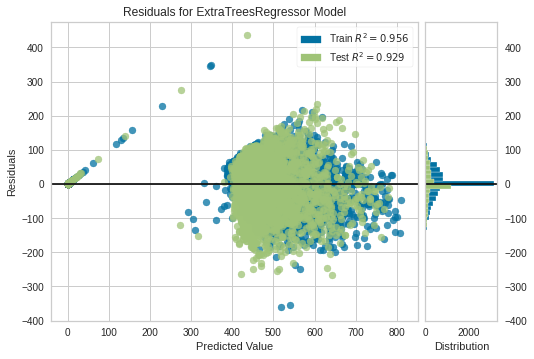

In [ ]:
plot_model(tuned_model)

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predictions= predict_model(tuned_model, test)

In [ ]:
predictions.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,A,428.9679
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,0,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,A,460.8636
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,A,537.2032
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,A,0.0000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,A,492.1752


# Salvando as predições

In [ ]:
predictions.rename(columns={'Label':'NU_NOTA_MT'}, inplace=True)
# asnwer passa a ter estas colunas
asnwer = predictions[['NU_INSCRICAO', 'NU_NOTA_MT']]

# salvando e fazendo download
asnwer.to_csv('answer.csv', index=False) 
files.download('answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Aqui o resultado foi de 93.6

# Nova tentativa

In [ ]:
data = setup(treino, target='NU_NOTA_MT', pca=True,
             pca_method='linear', pca_components=30,
             feature_selection=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5458
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(13730, 45)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,32
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
# select best model
models = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,43.0669,4021.3095,63.3926,0.9235,0.2078,0.1228,3.2749
1,Gradient Boosting Regressor,43.4142,4022.1806,63.4036,0.9235,0.6637,0.1214,8.3909
2,Extreme Gradient Boosting,43.5449,4032.2883,63.4807,0.9233,0.6924,0.1215,1.6356
3,Random Forest,43.0942,4043.9357,63.5710,0.9230,0.1665,0.1230,12.8968
4,CatBoost Regressor,44.1751,4081.8355,63.8665,0.9223,0.8118,0.1226,11.0938
5,Light Gradient Boosting Machine,43.8743,4136.6640,64.2981,0.9213,0.5685,0.1229,0.9302
6,Least Angle Regression,50.6689,4867.1422,69.7467,0.9074,1.4067,0.1305,0.0175
7,Bayesian Ridge,50.5177,4866.8240,69.7445,0.9074,1.3852,0.1306,0.0176
8,Linear Regression,50.6689,4867.1422,69.7467,0.9074,1.4067,0.1305,0.0126
9,Ridge Regression,50.6681,4867.1317,69.7466,0.9074,1.4066,0.1305,0.0070


In [ ]:
# create model
xtree = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42.9778,3950.6499,62.8542,0.9255,0.2247,0.1213
1,44.1915,4285.0430,65.4602,0.9178,0.2630,0.1239
2,43.0940,4207.6161,64.8661,0.9198,0.2775,0.1249
3,43.5610,3961.3374,62.9392,0.9227,0.2273,0.1253
4,43.8484,4066.8316,63.7717,0.9236,0.1878,0.1245
5,42.2986,3817.3258,61.7845,0.9255,0.1264,0.1213
6,41.2255,3795.9693,61.6114,0.9318,0.1560,0.1191
7,40.7874,3603.0458,60.0254,0.9304,0.2451,0.1170
8,43.5570,4078.0274,63.8594,0.9209,0.2182,0.1258
9,43.5793,4256.8715,65.2447,0.9204,0.1403,0.1226


In [ ]:
# tune hyperparameters extra tree
tuned_xtree = tune_model(xtree)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.1207,3992.2396,63.1842,0.9247,0.2907,0.1211
1,44.0087,4265.2134,65.3086,0.9181,0.3153,0.1227
2,42.9759,4169.3937,64.5708,0.9205,0.3484,0.1239
3,43.4801,3922.2864,62.6282,0.9235,0.2770,0.1246
4,43.7528,4080.0547,63.8753,0.9234,0.2699,0.1236
5,42.0301,3755.4182,61.2815,0.9267,0.2408,0.1196
6,41.1421,3768.7434,61.3901,0.9323,0.2676,0.1180
7,40.6423,3552.4294,59.6023,0.9314,0.3430,0.1159
8,43.8625,4164.4817,64.5328,0.9192,0.2851,0.1258
9,43.3314,4215.6407,64.9280,0.9212,0.2336,0.1212


In [ ]:
predictions= predict_model(tuned_xtree, test)

In [ ]:
predictions.rename(columns={'Label':'NU_NOTA_MT'}, inplace=True)
# asnwer passa a ter estas colunas
asnwer = predictions[['NU_INSCRICAO', 'NU_NOTA_MT']]

# salvando e fazendo download
asnwer.to_csv('answer.csv', index=False) 
files.download('answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>